<a href="https://colab.research.google.com/github/mitteth12/SportsJerseyImageClassification/blob/master/SportsJerseyImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a walkthrough in learning how to image classify. I do not take any credit for the code work.

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [ ]:
#https://www.codegrepper.com/code-examples/python/suppress+warnings+in+jupyter+notebook
#There are some code chunks that pop up with some warnings, so we are going to filter those out
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read in libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
#save path for Jerseys folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Jerseys/'

In [ ]:
#make folder names 
#folders = ['baseball', 'hockey', 'soccer', 'basketball', 'football', 'cricket', 'lacrosse']

In [ ]:
#create all folders in /Jerseys

#for i in folders:
  #path = Path(proj_path)
  #dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

This code chunk is a very important code chunk as it is the one that trains our data. It uses the ImageDataBunch function. Inside the data we have a couple arguments the first being our project path (p_path). Then we are wanting to train the data and our valid percentage is .2 meaning 20% of the data is going into the test dataset and the other 80% is going into our training model. 

In [ ]:
data.classes

['baseball',
 'basketball',
 'cricket',
 'football',
 'hockey',
 'lacrosse',
 'soccer']

It can be seen that our data has the 7 different sports that we included jerseys for.

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

This gives us a quick look at our training images showing what the different sports jerseys look like.

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baseball',
  'basketball',
  'cricket',
  'football',
  'hockey',
  'lacrosse',
  'soccer'],
 7,
 309,
 77)

This shows that some quick characteristics of the data we are modeling. Again we see the different sports we are classifying, the 7 indicates the amount of sports we have, the 309 represents the amount of training images that we have and the 77 is the amount of test images we have.

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

cnn_learner is a tool from the fastai website one that uses resnet 34 for transfer learning.

In [ ]:
# train 8 epochs of the model 
#learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.215481,2.100373,0.740260,02:07
1,2.441633,1.006141,0.259740,01:51
2,1.818501,0.732641,0.181818,01:51
3,1.413700,0.481422,0.116883,01:52
4,1.149883,0.353046,0.077922,01:59
5,0.949376,0.291901,0.077922,01:54
6,0.817396,0.247593,0.077922,01:54
7,0.712306,0.234191,0.077922,01:54


So it looks like we wont want to run that again as 8 epochs took 15 minutes to run! However, it looks like we have a pretty good predictor as it is about 92% accurate.

In [ ]:
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Jerseys/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

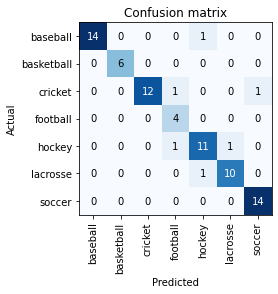

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

Interestingly enough it looks like there were not any sports that had multiple confusions. It looks like the two that had a little difficulty differentiating between other sports was football and hockey. I am curious to see the hockey jersey that was mistaken for a baseball jersey.

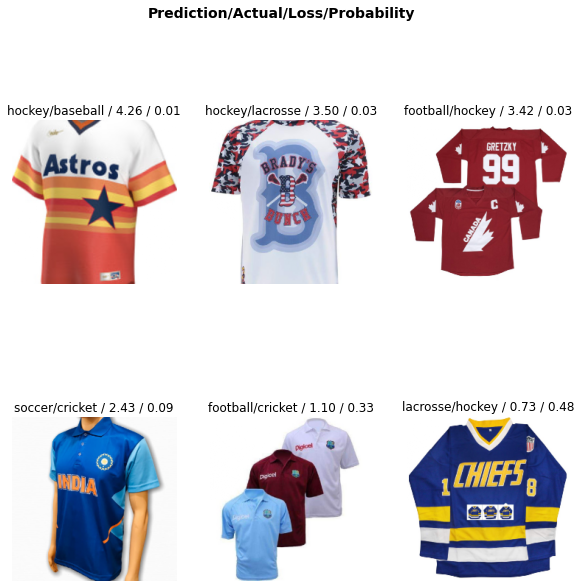

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(6, figsize=(10,10))

This is the most interesting part of the walkthrough for me. The first sport listed is what the jersey was predicted to be and the second is what it actually was. It is really interesting to think about why the Astros baseball jersey would have got mistaken for a hockey jersey. Maybe it was the stripes or maybe it had to do with the fact you cant see the whole collar. I think one of the big differentiating factors between the different jerseys was the sleeve size and the type of collar.

The second one is understandable as it looks more like a t-shirt than any jersey. I don't really feel like that is a mistake on the classifiers part. The third one is an interesting one. I think it might be the way the jersey is folded that may give the classifier trouble thinking that the hockey jersey is a football jersey because of the illusion of padding. The fourth one is very understandable as to how the classifier got soccer. I might have guessed soccer as well or at least if it was with a bunch of other soccer jersey pictures it would not have stuck out. The fifth one might be the most interesting. Out of all of the sports I would not predicted this picture to be it selected football. I am not sure what gave the classifier that conclusion so that one drives my curiousity. The last one is also pretty understandable at how the classifier would have thought that is a hockey jersey. All in all I would say there 3 out of the 77 that I would consider questionble judgements which is 96% accuracy!

In [30]:
img_soccer= open_image(Path(root_path)/'Jerseys_Valid'/'soccer_valid')
img_soccer
#img_football= open_image(Path(root_path)/'Jerseys_Valid'/'football_valid.jpg')
#img_football
#img_hockey= open_image(Path(root_path)/'Jerseys_Valid'/'hockey_valid.png')
#img_hockey

FileNotFoundError: ignored

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img_soccer)
pred_class
#pred_class,pred_idx,outputs = learn.predict(img_football)
#pred_class
#pred_class,pred_idx,outputs = learn.predict(img_hockey)
#pred_class